In [1]:
# DECISION TREE AND RANDOM FOREST - can be used for both regression and classification. Here, the model has a tree based structure.

# Random Forest is a type of bagging technique in ensemble learning. it is used when the data has more variance and less bias.

# in bagging, there are 'n' number of weak decision tree models knows as 'stump'. these stumps are trained parallely all at the same time. for classification, the final decision will be what the majority of the stumps predict. for regression, the final prediction will be the average of the predictions of all stumps. 

In [36]:
# importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV 
# train_test_split -> to split the data into training and test sets 
# GridSearchCV -> to search for the best hyperparameters.

from sklearn import tree #has model for decision tree.

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
#accuracy_score -> to calculate the accuracy of the decision tree and random forest.
#confusion_matrix -> to calculate the confusion matrix
# classification_report -> generates precision, recall, f1-score and various statistics

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# decision tree classifier

In [3]:
# importing the data set
df = pd.read_csv('heart.csv')
df.head()

# NOTE: this dataset contains the data of heart patients and the 'target' column contains categorical values where 0 -> healthy and 1 -> not healthy. out goal is to predict the 'target' column using all the other columns.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info() #you can notice that there are no missing values, so no need of data analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()
# you can see that the dataset has no missing values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.isna().sum()
#you can see that the dataset has no missing values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


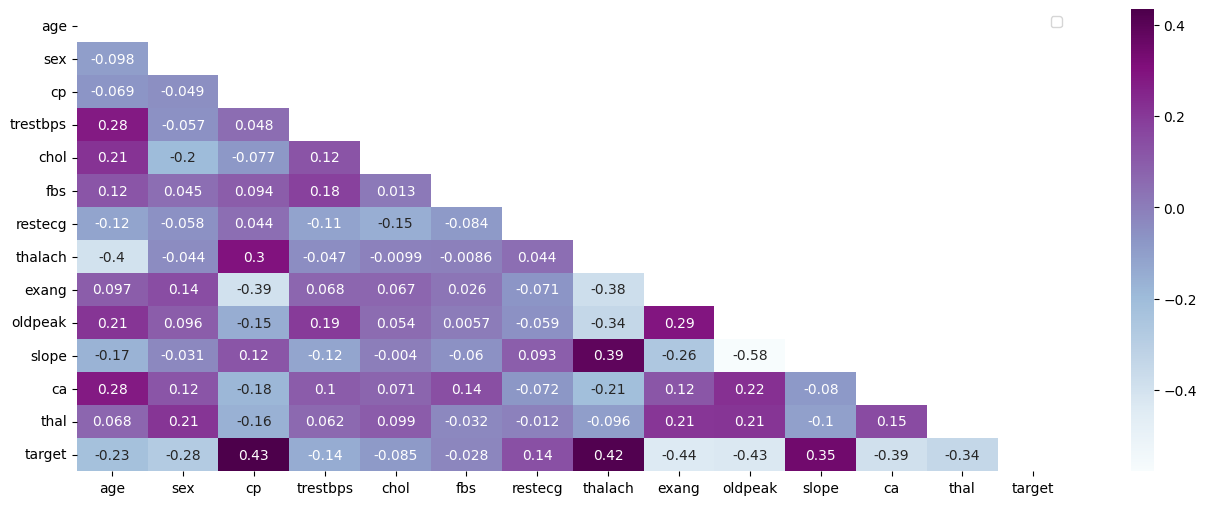

In [8]:
# correlation

mask = np.triu(np.ones_like(df.corr(), dtype = 'bool'))
plt.subplots(figsize = (16,6))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu', mask = mask)
plt.legend()
plt.show()

you can notice that there are no columns that significantly affect the 'target' column.

In [9]:
# TRAINING THE DECISION TREE MODEL

x = df.drop(columns = ['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) #splitting the data.

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) #training the model

train_pred = dt.predict(x_train) #predicting the values.
test_pred = dt.predict(x_test)

In [10]:
print("the accuracy score of the model with the trained data = ", accuracy_score(y_train, train_pred))
print("the accuracy score of the model with the test data = ", accuracy_score(y_test, test_pred))

print("\nthe classification report of the model with the trained data:\n", classification_report(y_train, train_pred)) #returns precision, recall, f1-score and support of the model between 'y' and 'y-hat'.
print("\nthe classification report of the model with the test data:\n", classification_report(y_test, test_pred))

the accuracy score of the model with the trained data =  1.0
the accuracy score of the model with the test data =  0.7142857142857143

the classification report of the model with the trained data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


the classification report of the model with the test data:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



visualising the decision tree

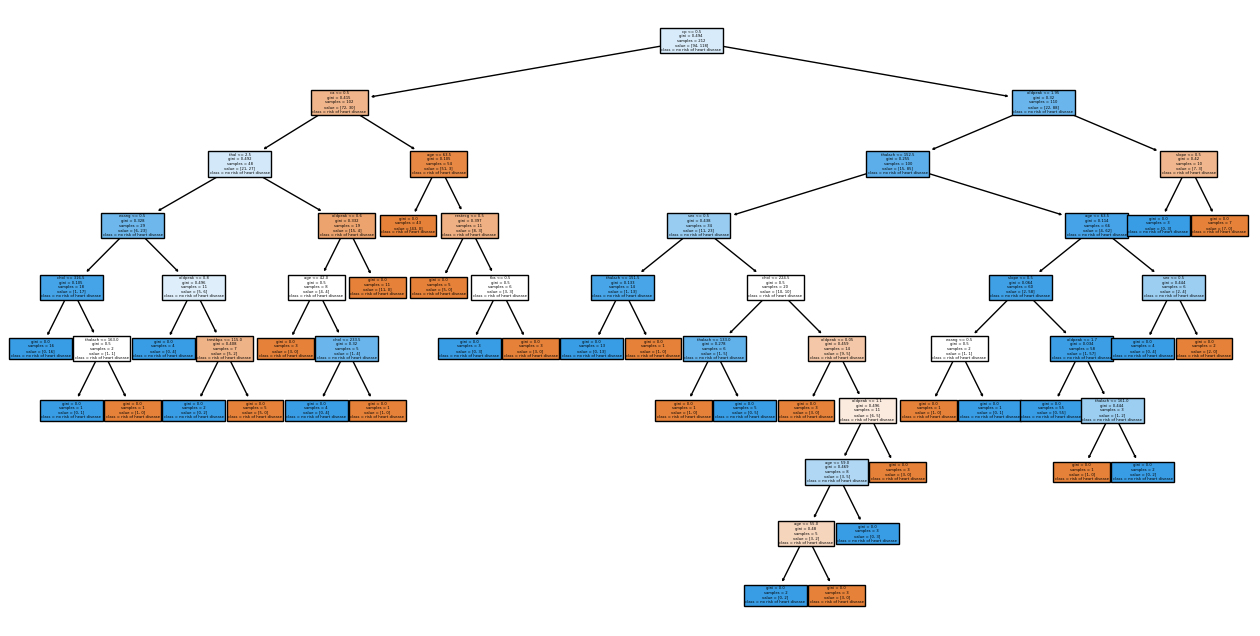

In [11]:
features = df.columns
classes = ['risk of heart disease', 'no risk of heart disease']

plt.subplots(figsize=(16, 8))
tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True)
plt.show()

you can notice the since the accuracy of the model with the trained data is 100% and with the test data is only 72.52%, we can say that the Decision Tree model is over fitted with the data as there is a significant difference between the accuracy with the trained data and the accuracy with the test data and also that accuracy with the test data is 100%.

### pruning : 
        pruning is a data compression technique to reduce the size of the decision tree by removing the nodes/branches that are not useful or a setback to the model.

        we use pruning to get better accuracy of the decision tree model.


#### types of pruning:
        ->pre-pruning - here, we try to restrict the growth of the decison tree during the model training process. we use hyperparameters like 'max_depth', 'min_samples_split' and 'min_samples_leaf' for pre-pruning

        ->post-pruning - here, we will let the model to train to its full depth without any restrictions then we will trim the nodes that are not useful.

NOTE : in most cases, post-pruning is better than pre-pruning.

## pre-pruning example: 

In [12]:
# HYPERPARAMETER TUNING FOR DECISION TREE: helps us in selecting the best attributes for the decision tree model to train.

# NOTE: there is no way to determine the best values for the hyperparameters. we can use a range of values and select the best values using grid search function.

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
    'max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator= dt, param_grid= param_grid, cv = 5, scoring= 'accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [13]:
grid_search.best_params_ #these are the best values for the hyper parameters.

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [14]:
# training the decision tree using the best hyper parameters
dt = DecisionTreeClassifier(random_state = 42, **grid_search.best_params_)
dt.fit(x_train, y_train)
best_train_pred = dt.predict(x_train)
best_test_pred = dt.predict(x_test)

In [15]:
print("the accuracy score of the model with the trained data = ", accuracy_score(y_train, best_train_pred))
print("the accuracy score of the model with the test data = ", accuracy_score(y_test, best_test_pred))

print("\nthe classification report of the model with the trained data:\n", classification_report(y_train, best_train_pred)) #returns precision, recall, f1-score and support of the model between 'y' and 'y-hat'.
print("\nthe classification report of the model with the test data:\n", classification_report(y_test, best_test_pred))

the accuracy score of the model with the trained data =  0.8632075471698113
the accuracy score of the model with the test data =  0.8131868131868132

the classification report of the model with the trained data:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        94
           1       0.89      0.86      0.87       118

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212


the classification report of the model with the test data:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.88      0.74      0.80        47

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



Now, you can notice that the accuracy of the model with the train data and test data are quite similar so we can say that the model is not overfitting. also notice that the accuracy of the model with the test data is increased.

-NOTE : There are many more hyperparameters that you can use to increase the accuracy of the model.

visualising the tree after pre-pruning

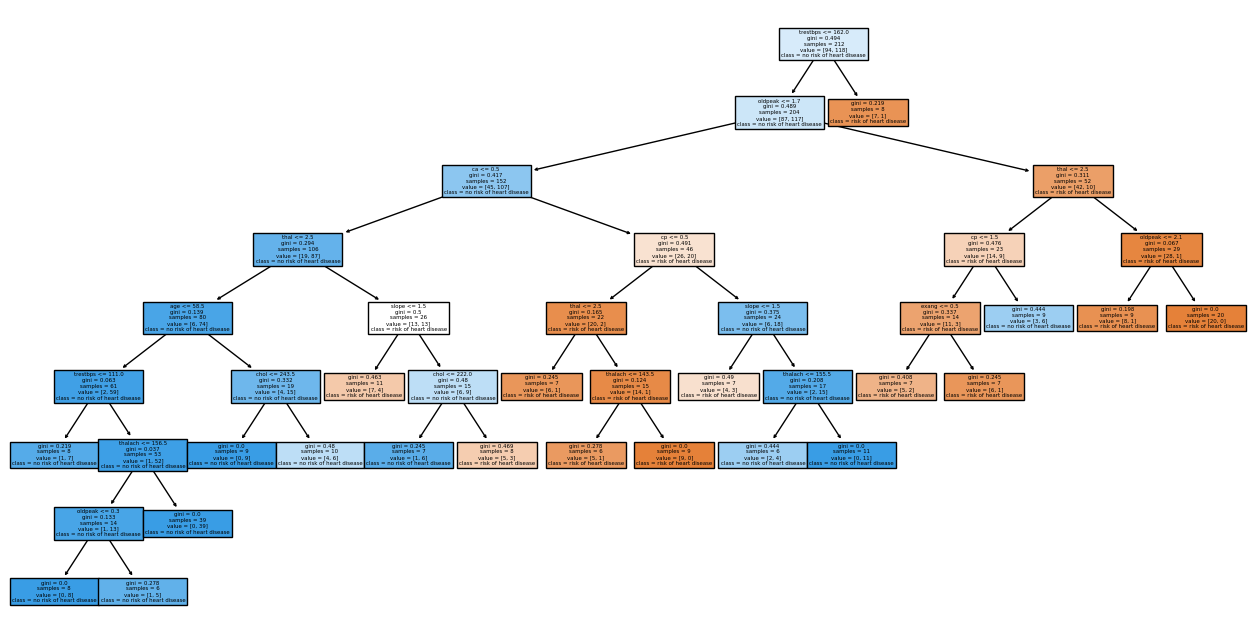

In [16]:
features = df.columns
classes = ['risk of heart disease', 'no risk of heart disease']

plt.subplots(figsize=(16, 8))
tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True)
plt.show()

## post-pruning:
    we will use cost complixity pruning(CCP)

In [17]:
dtc = DecisionTreeClassifier()
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurity = path.ccp_alphas, path.impurities

In [24]:
models = [] 
model_accuracy = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    dtc.fit(x_train, y_train)
    models.append(dtc)

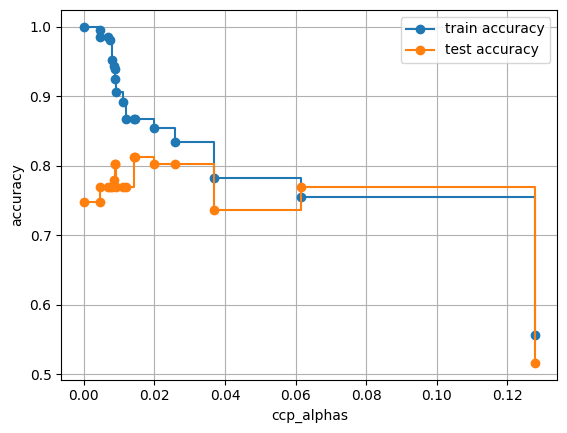

In [19]:
train_accuracy = [dtc.score(x_train, y_train) for dtc in models]
test_accuracy = [dtc.score(x_test, y_test) for dtc in models]

plt.plot(ccp_alphas, train_accuracy, label = 'train accuracy', marker = 'o', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_accuracy, label = 'test accuracy', marker = 'o', drawstyle = 'steps-post')
plt.xlabel('ccp_alphas')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()


you can see that at ccp_alpha = 0.07, we get similar accuracy for both training and testing data.

In [20]:
# training the model with ccp_alpha = 0.07

dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.07)
dtc.fit(x_train, y_train)
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

In [21]:
print("the accuracy score of the model with the trained data = ", accuracy_score(y_train, y_pred_train))
print("the accuracy score of the model with the test data = ", accuracy_score(y_test, y_pred_test))

print("\nthe classification report of the model with the trained data:\n", classification_report(y_train, y_pred_train)) #returns precision, recall, f1-score and support of the model between 'y' and 'y-hat'.
print("\nthe classification report of the model with the test data:\n", classification_report(y_test, y_pred_test))

the accuracy score of the model with the trained data =  0.7547169811320755
the accuracy score of the model with the test data =  0.7692307692307693

the classification report of the model with the trained data:
               precision    recall  f1-score   support

           0       0.71      0.77      0.73        94
           1       0.80      0.75      0.77       118

    accuracy                           0.75       212
   macro avg       0.75      0.76      0.75       212
weighted avg       0.76      0.75      0.76       212


the classification report of the model with the test data:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



visualising the tree after post pruning

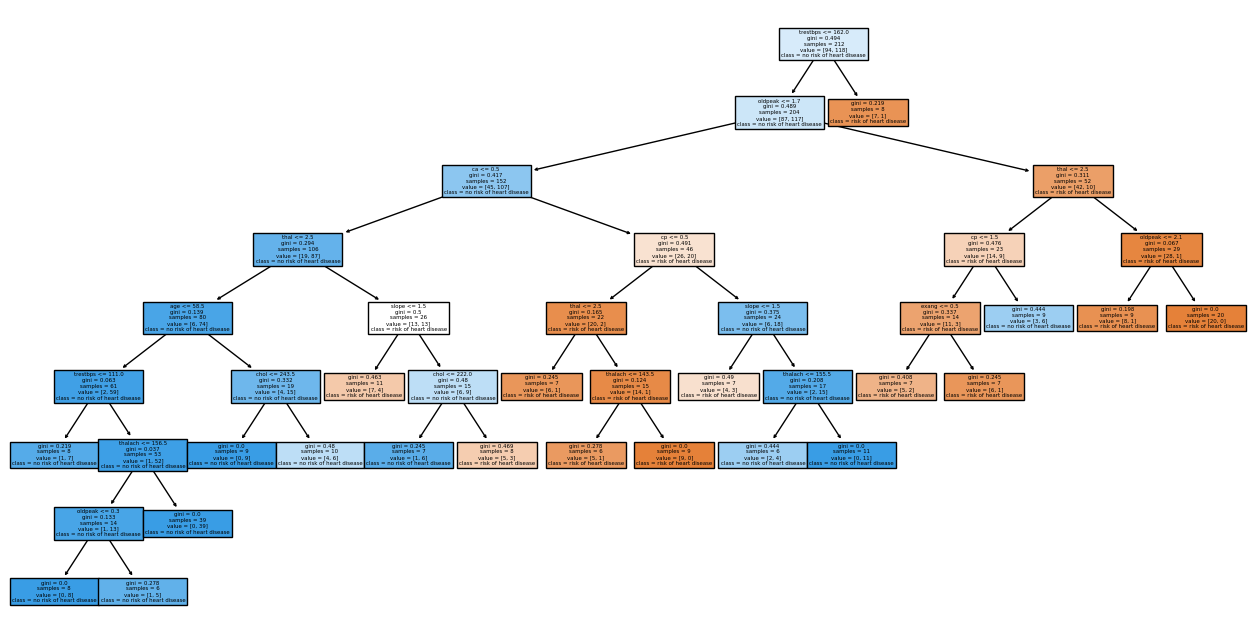

In [22]:
features = df.columns
classes = ['risk of heart disease', 'no risk of heart disease']

plt.subplots(figsize=(16, 8))
tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True)
plt.show()

you can further increase the accuracy score by various EDA techniques, but we will not use as it is outside the scope of this notebook.

# decision tree regression

In [25]:
# used for regression problems(predicting continuous numbers)

# importing the dataset
boston_price = pd.read_csv('./Boston_Housing_Dataset.csv')
boston_price.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [27]:
x = boston_price.drop('PRICE', axis = 1)
y = boston_price.PRICE

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, test_size=0.2)

In [29]:
# decision tree regressor model

regressor = DecisionTreeRegressor()
regressor.fit(xtrain, ytrain)
train_pred = regressor.predict(xtrain)
test_pred = regressor.predict(xtest)

In [32]:
print("the mean squared error of the model with the trained data = ", mean_squared_error(ytrain, train_pred))
print("the mean squared error of the model with the test data = ", mean_squared_error(ytest, test_pred))

the mean squared error of the model with the trained data =  0.0
the mean squared error of the model with the test data =  33.85460784313726


you can see that the model is overfitted to the training data, you can use hyperparameter tuning or other pruning methods as we have done above to generalize the model to the test data. you can also do EDA(explorator y data analysis) to get better error value.

you can also visualize the regressor model as we have show above.

# random forest classifier

In [ ]:
#random forest is a combination of decision trees. More accurate than decision trees.

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

In [ ]:
print("the accuracy score of the model with the trained data = ", accuracy_score(y_train, rf_train_pred))
print("the accuracy score of the model with the test data = ", accuracy_score(y_test, rf_test_pred))

print("\nthe classification report of the model with the trained data:\n", classification_report(y_train, rf_train_pred)) #returns precision, recall, f1-score and support of the model between 'y' and 'y-hat'.
print("\nthe classification report of the model with the test data:\n", classification_report(y_test, rf_test_pred))

the accuracy score of the model with the trained data =  1.0
the accuracy score of the model with the test data =  0.8571428571428571

the classification report of the model with the trained data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


the classification report of the model with the test data:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



you can clearly see that the model is overfitted. in order to overcome this problem, we can use hyperparameter tuning. here, unlike decision trees there is no post-pruning methods because even though individual decision trees inside the random forest may by overfitted, the random forest returns the average of the outputs of all the decision trees.

In [ ]:
# applying hyperparameters to increase the accuracy.

rf = RandomForestClassifier(random_state= 42)

param_grid = {
    'n_estimators': [300, 350, 400],
    'max_depth': [None, 10, 11, 12, 13, 14],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 6, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 11, 12, 13, 14],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 350, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_ #these are the best hyperparameter values.

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 350}

In [ ]:
rf = RandomForestClassifier(random_state=42, **grid_search.best_params_) #raining the model with the hyperparameters.
rf.fit(x_train, y_train)
rf_best_train_pred = rf.predict(x_train)
rf_best_test_pred = rf.predict(x_test)

In [ ]:
print("the accuracy score of the model with the trained data = ", accuracy_score(y_train, rf_best_train_pred))
print("the accuracy score of the model with the test data = ", accuracy_score(y_test, rf_best_test_pred))

print("\nthe classification report of the model with the trained data:\n", classification_report(y_train, rf_best_train_pred)) #returns precision, recall, f1-score and support of the model between 'y' and 'y-hat'.
print("\nthe classification report of the model with the test data:\n", classification_report(y_test, rf_best_test_pred))

the accuracy score of the model with the trained data =  0.9952830188679245
the accuracy score of the model with the test data =  0.8351648351648352

the classification report of the model with the trained data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      1.00       118

    accuracy                           1.00       212
   macro avg       1.00      0.99      1.00       212
weighted avg       1.00      1.00      1.00       212


the classification report of the model with the test data:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



looks like this is the maximum accuracy achieved

# NOTE : the following hyperparameters also give the same accuracy:
    {'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300 
    }
    time taken to calculate these hyperparameters is around 20 mins.

# where as these are the hyperparameters we used:
    {'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 350
    }
    time taken to calculate these hyperparameters is around 84 mins.

eventhough the results are almost same, the time taken to calculate the first set of hyperparameters is much less than the time taken to calculate the hyperparameters we used.

# random forest regressor

In [33]:
# used for regression problems(predicting continuous numbers)

# importing the dataset
boston_price = pd.read_csv('./Boston_Housing_Dataset.csv')
boston_price.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
boston_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [37]:
x = boston_price.drop('PRICE', axis = 1)
y = boston_price.PRICE

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, test_size=0.2)

In [38]:
# random foreast regressor model

regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)
train_pred = regressor.predict(xtrain)
test_pred = regressor.predict(xtest)

In [39]:
print("the mean squared error of the model with the trained data = ", mean_squared_error(ytrain, train_pred))
print("the mean squared error of the model with the test data = ", mean_squared_error(ytest, test_pred))

the mean squared error of the model with the trained data =  1.430797972772278
the mean squared error of the model with the test data =  18.84366044117648


In [40]:
regressor.estimators_  #returns the decision trees inside the random forest. you can visualize the individual decision trees using the method discussed previously in the notebook.

# use regressor.estimators_[index] to access individual decision trees.

[DecisionTreeRegressor(max_features=1.0, random_state=1836131384),
 DecisionTreeRegressor(max_features=1.0, random_state=795657665),
 DecisionTreeRegressor(max_features=1.0, random_state=323305423),
 DecisionTreeRegressor(max_features=1.0, random_state=805363709),
 DecisionTreeRegressor(max_features=1.0, random_state=272655520),
 DecisionTreeRegressor(max_features=1.0, random_state=89496643),
 DecisionTreeRegressor(max_features=1.0, random_state=681220729),
 DecisionTreeRegressor(max_features=1.0, random_state=1229195440),
 DecisionTreeRegressor(max_features=1.0, random_state=1140818309),
 DecisionTreeRegressor(max_features=1.0, random_state=682265282),
 DecisionTreeRegressor(max_features=1.0, random_state=266308776),
 DecisionTreeRegressor(max_features=1.0, random_state=2006339738),
 DecisionTreeRegressor(max_features=1.0, random_state=1253499118),
 DecisionTreeRegressor(max_features=1.0, random_state=1306237305),
 DecisionTreeRegressor(max_features=1.0, random_state=924666371),
 Deci